In [1]:
def split(DataFrame):
    import pandas as pd
    import numpy as np
    df = pd.read_csv(DataFrame)
    df['split'] = np.random.randn(df.shape[0], 1)
    msk = np.random.rand(len(df)) <= 0.6
    first = df[msk]
    second = df[~msk]
    return (first.to_csv('first.csv',index = False),second.to_csv('second.csv',index = False))

In [2]:
split('HouseData.csv')

(None, None)

In [7]:
import pandas as pd
first = pd.read_csv('first.csv')
first.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,split
0,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,-0.337491
1,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,-0.821561
2,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,307000,1.808589
3,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Shed,350,11,2009,WD,Normal,200000,-0.346538
4,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900,-0.589839


In [8]:
second = pd.read_csv('second.csv')
second.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,split
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,-0.971451
1,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,0.027109
2,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1.134993
3,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000,-0.328028
4,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2006,New,Partial,345000,-0.287235


In [9]:
print(len(first))
print(len(second))

867
593


In [10]:
mar = pd.read_csv('Marketing.csv')
mar.head()

,Unnamed: 0,custAge,class,marital,schooling,default,housing,loan,contact,month,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,0,55.0,admin.,single,university.degree,unknown,no,no,cellular,nov,...,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no
1,1,NaN,blue-collar,married,NaN,no,no,no,cellular,jul,...,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0,no
2,2,42.0,technician,married,high.school,no,no,no,telephone,may,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0,no
3,3,55.0,management,divorced,NaN,unknown,yes,yes,cellular,jul,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0,no
4,4,NaN,admin.,divorced,university.degree,no,yes,no,cellular,may,...,1,failure,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,no


In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [12]:
le.fit(mar['class'])

LabelEncoder()

In [13]:
list(le.classes_)

['admin.',
 'blue-collar',
 'entrepreneur',
 'housemaid',
 'management',
 'retired',
 'self-employed',
 'services',
 'student',
 'technician',
 'unemployed',
 'unknown']

In [14]:
mar['Label'] = le.fit_transform(mar['class'])
mar.head()

,Unnamed: 0,custAge,class,marital,schooling,default,housing,loan,contact,month,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded,Label
0,0,55.0,admin.,single,university.degree,unknown,no,no,cellular,nov,...,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no,0
1,1,NaN,blue-collar,married,NaN,no,no,no,cellular,jul,...,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0,no,1
2,2,42.0,technician,married,high.school,no,no,no,telephone,may,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0,no,9
3,3,55.0,management,divorced,NaN,unknown,yes,yes,cellular,jul,...,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0,no,4
4,4,NaN,admin.,divorced,university.degree,no,yes,no,cellular,may,...,failure,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,no,0


In [15]:
def Label_encoding(DataFrame):
    import pandas as pd
    import numpy as np
    df = pd.read_csv(DataFrame)
    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    le.fit(df['class'])
    df['Label'] = le.fit_transform(df['class'])
    return mar
    

In [16]:
Label_encoding('Marketing.csv')

,Unnamed: 0,custAge,class,marital,schooling,default,housing,loan,contact,month,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded,Label
0,0,55.0,admin.,single,university.degree,unknown,no,no,cellular,nov,...,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no,0
1,1,NaN,blue-collar,married,NaN,no,no,no,cellular,jul,...,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0,no,1
2,2,42.0,technician,married,high.school,no,no,no,telephone,may,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0,no,9
3,3,55.0,management,divorced,NaN,unknown,yes,yes,cellular,jul,...,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0,no,4
4,4,NaN,admin.,divorced,university.degree,no,yes,no,cellular,may,...,failure,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7409,7409,33.0,blue-collar,single,high.school,no,no,no,telephone,may,...,nonexistent,1.1,93.994,-36.4,4.859,5191.0,999.0,0,no,1
7410,7410,45.0,blue-collar,married,basic.4y,unknown,no,no,telephone,jul,...,nonexistent,1.4,93.918,-42.7,4.961,5228.1,999.0,0,no,1
7411,7411,27.0,blue-collar,single,NaN,no,no,no,cellular,may,...,failure,-1.8,92.893,-46.2,1.250,5099.1,999.0,3,no,1
7412,7412,51.0,unemployed,divorced,high.school,unknown,yes,no,cellular,nov,...,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,999.0,0,no,10


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x_train=vectorizer.fit_transform()
y_train=df['xyz']
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
nb = MultinomialNB()
nb.fit(x_train,y_train)
def metrics(df,x,y):
    for i,c in df.groupby(['x','y']):
    print("Actual "+ i[0]+ " Predicted "+i[1]+ ":", len(c))
    
    

In [19]:
results = pd.read_csv("Results.csv")
results.head()
results.drop('Unnamed: 0',1)

,ActualValues,PredictedValues
0,0,0
1,0,0
2,0,0
3,1,1
4,1,0
...,...,...
7409,0,0
7410,0,0
7411,0,0
7412,1,0


In [50]:
def metrics(df):
    import matplotlib.pyplot as plt 
    from sklearn.metrics import roc_curve
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import roc_auc_score
    tn, fp, fn, tp =  confusion_matrix(df['ActualValues'],df['PredictedValues']).ravel()
    fp, tp, thresholds = roc_curve(results['ActualValues'],results['PredictedValues'])
    plot_roc_curve(fp, tp)
    return(tn, fp, fn, tp)

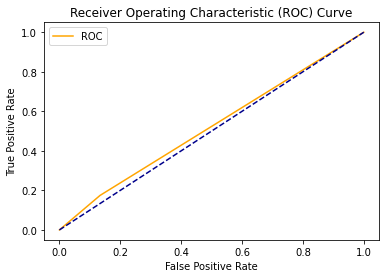

(3097,
 array([0.        , 0.13346391, 1.        ]),
 3170,
 array([0.        , 0.17447917, 1.        ]))

In [51]:
metrics(results)